<a href="https://colab.research.google.com/github/KeldenGhalay/Week12_Assignment_KG/blob/main/Machine_Learning_Algorithms_Application_solution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Machine Learning Process

The Machine Learning process involves building a Predictive model that can be used to find a solution for a Problem Statement. To understand the Machine Learning process let’s assume that you have been given a problem that needs to be solved by using Machine Learning.

The problem is to predict the occurrence of rain in your local area by using Machine Learning.

The below steps are followed in a Machine Learning process:

**Step 1: Define the objective of the Problem Statement**

At this step, we must understand what exactly needs to be predicted. In our case, the objective is to predict the possibility of rain by studying weather conditions. At this stage, it is also essential to take mental notes on what kind of data can be used to solve this problem or the type of approach you must follow to get to the solution.

**Step 2: Data Gathering**

At this stage, you must be asking questions such as,

    What kind of data is needed to solve this problem?
    Is the data available?
    How can I get the data?

Once you know the types of data that is required, you must understand how you can derive this data. Data collection can be done manually or by web scraping. However, if you’re a beginner and you’re just looking to learn Machine Learning you don’t have to worry about getting the data. There are 1000s of data resources on the web, you can just download the data set and get going.

Coming back to the problem at hand, the data needed for weather forecasting includes measures such as humidity level, temperature, pressure, locality, whether or not you live in a hill station, etc. Such data must be collected and stored for analysis.

## Activity: CLASSIFYING FRUITS DATASET

The purpose of this example is to identify the machine learning algorithm that is best-suited  for the task of distinguishing between different types of fruits. Your task is to implement several machine learning algorithms in Python using Scikit-learn, the most popular machine learning tool for Python.

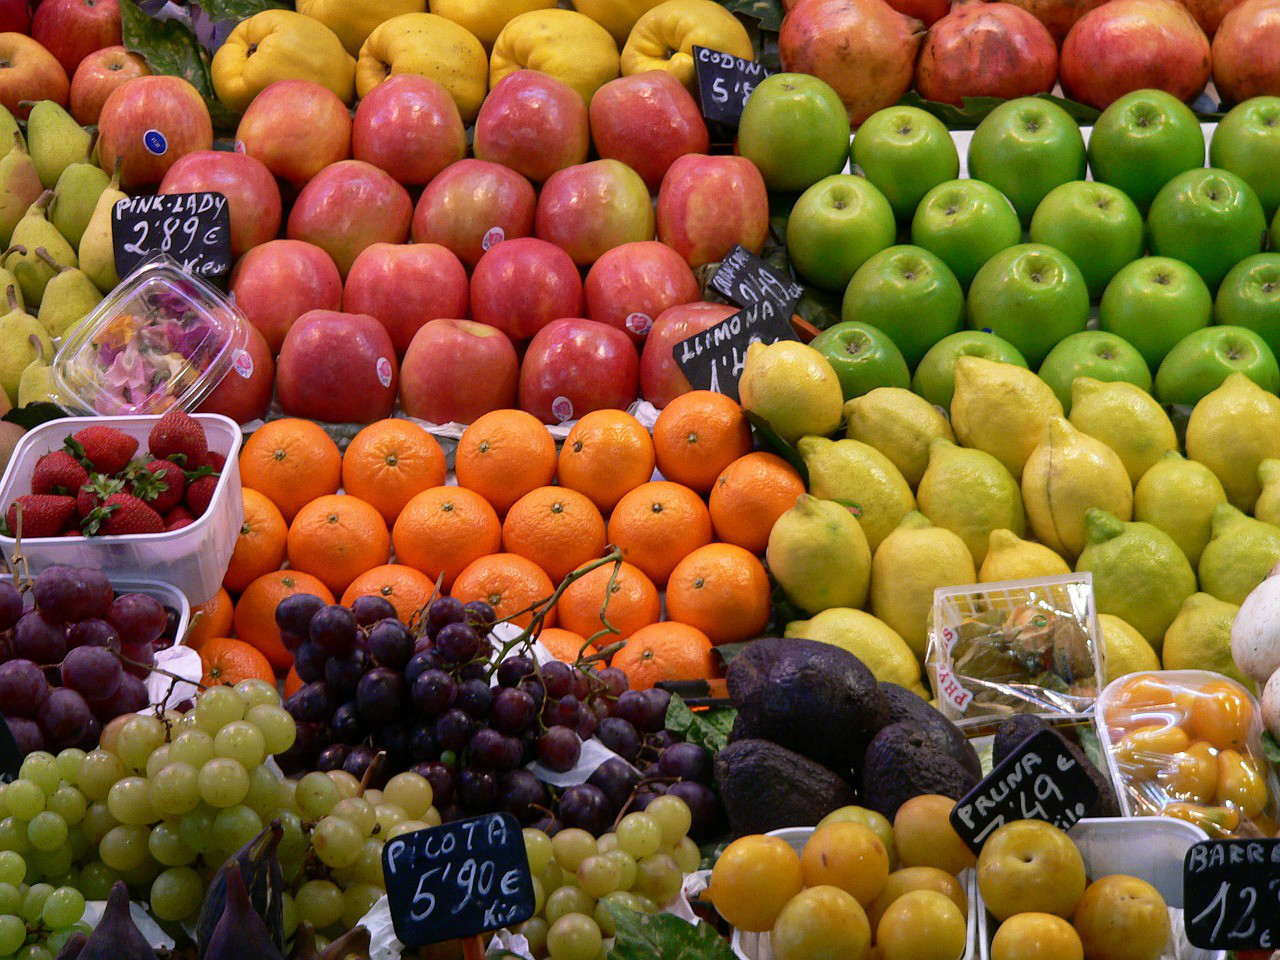

In [ ]:
path="C:\\Users\\lenovo\\Tutorials\\03. Data Science\\DS images 3\\1 GnNVxoh_H8n7Z2d7ceCBUw.jpeg"
display(Image.open(path))

### Data

The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table.

Let’s start working on the data by uplaoding dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fruit_data_with_colors.txt to fruit_data_with_colors.txt


In [ ]:
data= 'https://raw.githubusercontent.com/rocksaint/fruit-data-with-colours/master/fruit_data_with_colours.csv'

In [ ]:
# import the required libraries
%matplotlib inline
import pandas as pd # loading Library

import matplotlib.pyplot as plt # Loading library


fruits = pd.read_csv(data) # creating datafram fruits dataframe, removed sep="\t" as it's a csv
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruit as represented
by several features that are in the table’s columns.

We have 59 pieces of fruits and 7 features in the dataset:

In [ ]:
#Write a code to display sahpe of data
print(fruits.shape)

(59, 7)


We have four types of fruits in the dataset:

In [ ]:
# print unique fruits in fruits column
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


The data is pretty balanced except mandarin. We will just have to go with it:

In [ ]:
# print number of entries in each fruit type
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


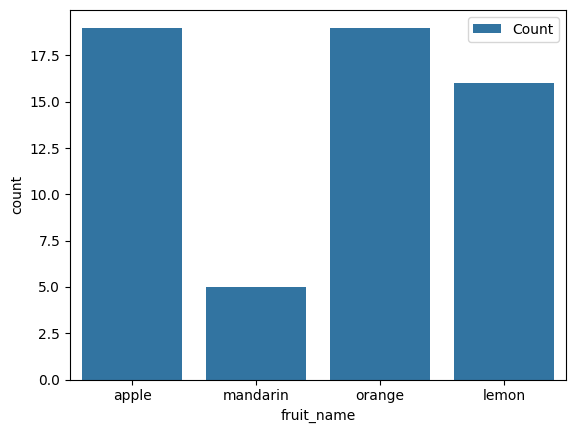

In [ ]:
# display number of fruits using bar chart
import seaborn as sns
sns.countplot(x='fruit_name', data=fruits, label="Count") # specify x and data
plt.show()

The graph shows the distribution of each fruit categiry .....

**Visualization**

Box plot for each numeric variable will give us a clearer idea of the distribution of
the input variables:

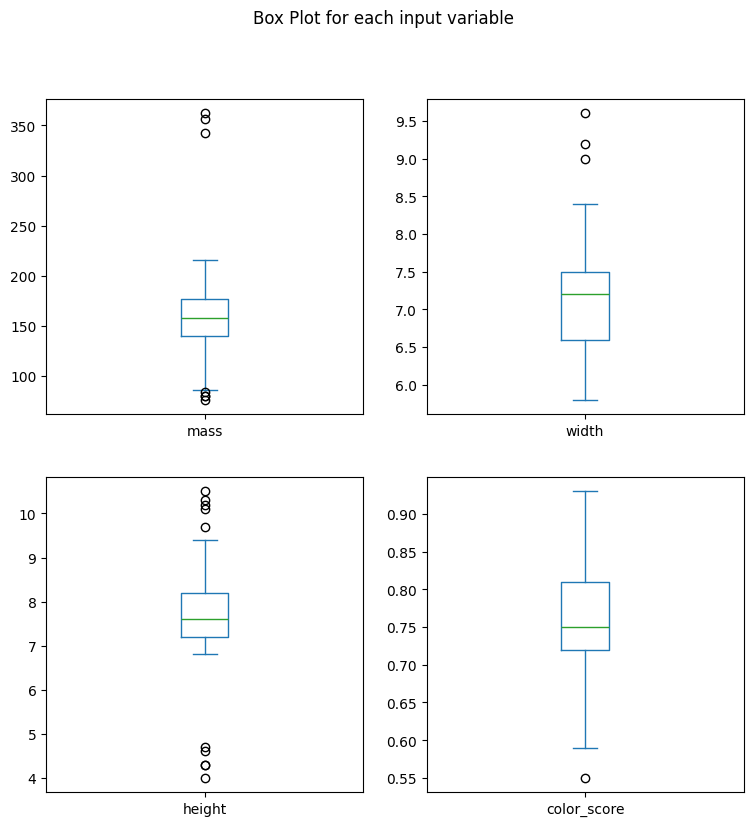

In [ ]:
# display outliers with box plot

fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2),
                                        sharex=False, sharey=False, figsize=(9, 9),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

**Distribution**

It looks like perhaps color score has a near Gaussian distribution:

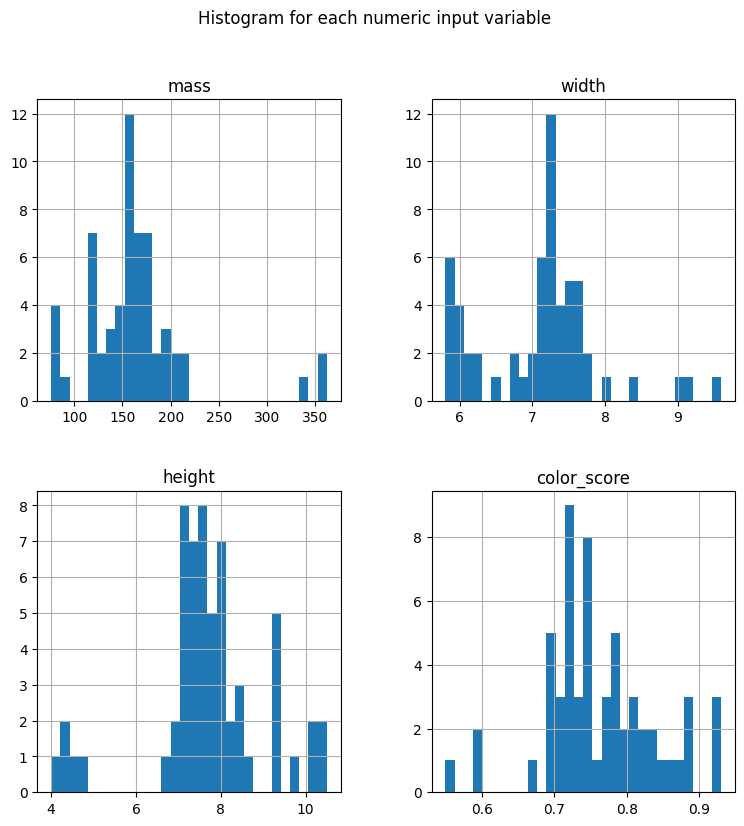

In [ ]:
# show distribution of data
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

**Correlation**

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Change fruits name into numeruic

In [ ]:
feature_names = ['mass', 'width', 'height', 'color_score'] # storing features in an array

X = fruits[feature_names] # data with features
y = fruits['fruit_label'] # label we want to predict


,fruit_label
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,1
9,1


/tmp/ipython-input-1513274088.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('gnuplot')


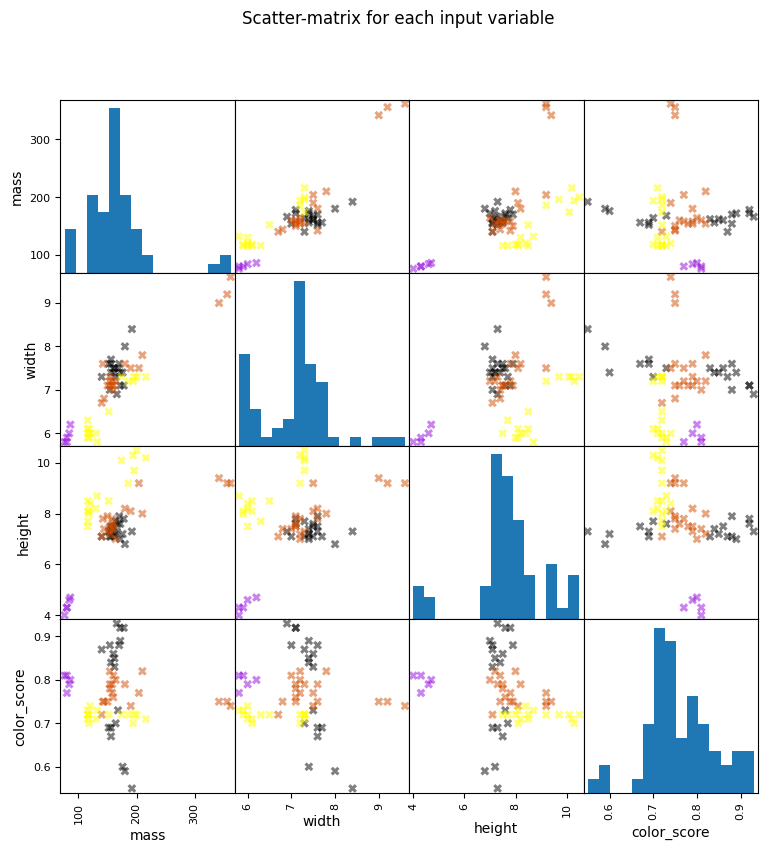

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'X', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

**Statistical Summary**

We can see that the numerical values do not have the same scale.
We will need to apply scaling to the test set that we computed for the training set.

In [ ]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

# Process to apply ML Algorithm
1. load data
2. clean data--> EDA
3. Visulaization --> Identify pattern
4. Apply ML


*   Split train and test (80% training and 20% for testing)
*   Apply algorithm ( 4 lines of code)
*   Evaluate the result (1 line of code)
*   Make decisions









**Train and Test Sets**
https://scikit-learn.org/stable/


In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


# Chage Textual values to Numeric

fruits["fruit_name"].replace(['apple' 'mandarin' 'orange' 'lemon'],[1, 2, 3,4],inplace=True)


In [ ]:
# fruits["fruit_name"].replace(['apple', 'mandarin', 'orange' ,'lemon'],[1, 2, 3,4], inplace=True)
fruits .head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


* X= Features
* Y = label

* X- Data train (80%), X test(20%)
* Y- Lable train(80%), y test(20)




In [ ]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# add other split examples 25 and 30%
You just need to add testsize

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, random_state=0)

**Scaling**
Read more: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

* Xtrain  instead of x


In [ ]:
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Apply min_max scale to make uniform distribution of all values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# add other split examples 25 and 30%
You just need to add testsize

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, random_state=0)

### Build Models

#### 1) Logistic Regression

In [ ]:
def add(x,y):
  return x+y

xt=4
yt=5
xtest=1
ytest= 5
print(add(xt,yt))
print(add(xtest,ytest))

9
6


In [ ]:
from sklearn.linear_model import LogisticRegression # import the function from library

logreg = LogisticRegression() # assign to a varibale
logreg.fit(X_train, y_train)# applying that function to our dataset



# evaluation
# print the accuracy on training dataset
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
# print the accuracy on Test dataset
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


#### 2) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# fit the model on dataset

clf = DecisionTreeClassifier().fit(X_train, y_train)
# print the accuracy on Training dataset
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
# print the accuracy on Test dataset
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


#### 3) K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# fit the model on dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


# print the accuracy on Training dataset
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
# print the accuracy on Test dataset
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


#### 4) Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# fit the model on dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


#### 5) Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# fit the model on dataset
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


#### 6) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
# fit the model on dataset
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))

print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.80


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Apply classification report and confusion mtrix on all of the above models
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



***########################################GOOD LUCK###############################################***